In [25]:
import numpy as np
import pandas as pd
import scipy.stats as sci
import matplotlib.pyplot as plt
import seaborn as sns

Сделаем анализ страховки по двум параметрам: курение и ИМТ.

# Курение

In [26]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


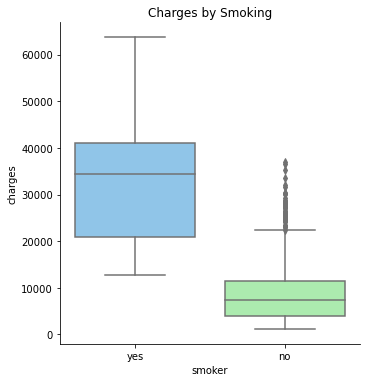

In [43]:
custom_palette = ["#81c8f7","#a2f5a6"]
sns.set_palette(custom_palette)
ax = sns.catplot(x="smoker", 
            y="charges",
            kind="box",
            data=insurance)
plt.title("Charges by Smoking")
plt.show()

In [28]:
#Тестом Манна-Уитни определим, различаются ли страховые расходы у курильщиков и нет
smoke_y = insurance["smoker"] == "yes"
smoker_charges = insurance[smoke_y]["charges"]
smoke_n = insurance["smoker"] == "no"
no_smoker_charges = insurance[smoke_n]["charges"]
sci. mannwhitneyu (smoker_charges, no_smoker_charges)

MannwhitneyuResult(statistic=7403.0, pvalue=2.6351167222517853e-130)

На 5% уровне значимости принимаем гипотезу о том, что расходы страховки у курящих людей выше, чем у некурящих.

In [29]:
#Составим сводную таблицу 
smoker_vs_sex = pd.crosstab(insurance["smoker"], insurance["sex"])
smoker_vs_sex

sex,female,male
smoker,,
no,547,517
yes,115,159


In [30]:
ar = [[526.4, 537.6],
        [135.6, 138.4]]
pd.DataFrame(ar)

,0,1
0,526.4,537.6
1,135.6,138.4


In [31]:
#Применим тест хи-квадрат к этой таблице
sci.chi2_contingency(smoker_vs_sex)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

На 5% уровне значимости отвергаем гипотезу о независимости: курение зависит от пола

# Индекс массы тела

In [32]:
#Построим 95% доверительный интервал для ИМТ
sci.norm.interval(alpha=0.95, loc=np.mean(insurance["bmi"]), scale=sci.sem(insurance["bmi"]))

(30.33664297153481, 30.990150750438264)

Text(0.5, 1.0, 'distribution of bmi')

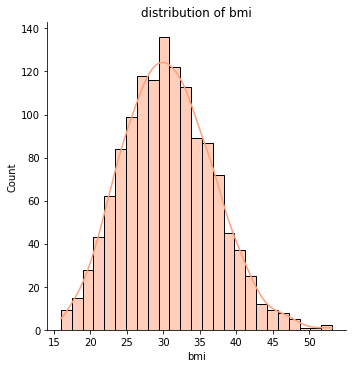

In [45]:
sns.displot(x="bmi", kde=True, data=insurance, color="lightsalmon")
plt.title("distribution of bmi")

In [34]:
np.mean(insurance["bmi"])

30.663396860986538

Теперь построим линейную регрессию: зависимость страховки от ИМТ

Text(0.5, 1.0, 'Charges by bmi')

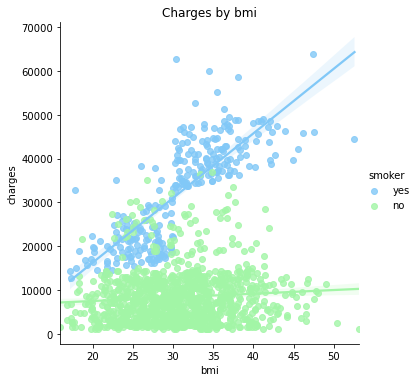

In [44]:
sns.lmplot(x="bmi", 
            y="charges", 
            hue="smoker",
            data=insurance)
plt.title("Charges by bmi")

In [36]:
from scipy.stats.stats import pearsonr
pearsonr(insurance[smoke_y]["charges"], insurance[smoke_y]['bmi'])

(0.806480607015541, 5.0196686317934723e-64)

In [37]:
pearsonr(insurance[smoke_n]["charges"], insurance[smoke_n]['bmi'])

(0.08403654312833284, 0.006091408541833878)

На 5% уровне значимости существует корреляция между страховкой и индексом массы тела в обеих группах: курящие и некурящие

In [38]:
pearsonr(insurance["charges"], insurance['bmi'])

(0.19834096883362912, 2.459085535117846e-13)